# Clasificador de estrategias

## kmeans

In [49]:
import numpy as np
import pandas as pd
import matplotlib as plt
from math import sqrt
from yellowbrick.cluster import KElbowVisualizer
from statistics import stdev


In [50]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
#import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA 

In [51]:
# parameters
n = (2520) # number of observation to choose


In [52]:
# Load the data
path = '/Archivos/MIDS/GitHub/models/PI_2/Features.csv'
#Archivos/MIDS/GitHub/models/PI_2/Features.csv
Features = pd.read_csv('Rentabilidad de estrategias base 100.csv', index_col=0)

In [53]:
Features.head(5)

,LA1,SA1,LSA1,LA101,SA101,LSA101,LA2,SA2,LSA2,LA3,...,LSA53,LA54,SA54,LSA54,LA6,SA6,LSA6,LAMAR,SAMAR,LSAMAR
Date,,,,,,,,,,,,,,,,,,,,,
2008-10-31,112.315749,101.786622,114.102371,114.322571,103.793443,118.116014,99.449679,88.920552,88.370231,104.354609,...,81.883986,96.206557,85.677429,81.883986,104.354609,93.825481,98.180090,96.206557,85.677429,81.883986
2008-11-03,108.673546,102.316747,110.996498,106.226580,100.349511,105.832219,100.307494,93.034200,93.220667,103.600199,...,90.399733,99.398751,91.744855,90.399733,103.600199,96.678447,100.455694,99.398751,91.744855,90.399733
2008-11-04,125.214699,88.014545,112.375738,127.844695,91.470217,118.005653,112.245048,76.940813,88.189179,119.390981,...,80.001433,108.193919,73.073908,80.001433,119.390981,83.184769,101.746311,108.193919,73.073908,80.001433
2008-11-05,99.808765,100.439696,105.439075,98.080355,101.646659,103.660622,96.722894,92.773882,94.141451,99.195744,...,89.726586,96.156896,90.086712,89.726586,99.195744,97.735318,102.333012,96.156896,90.086712,89.726586
2008-11-06,80.598195,117.785421,103.353926,75.685445,115.555927,94.176416,81.308015,111.866757,98.512300,79.377214,...,97.935928,82.998843,110.656415,97.935928,79.377214,113.898740,98.811468,82.998843,110.656415,97.935928


In [54]:
df = Features.tail(2520)

In [55]:
import datetime as dt
#Features['Date'] = pd.to_datetime(df['Date'])

#include = df[df['Date'].dt.year == year]


In [56]:
# calculamos el retorno y volatilidad.

returns = df.pct_change().mean()
returns = pd.DataFrame(returns)
returns.columns = ['Returns'] 
returns['Volatility'] = df.pct_change().std()

#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
data

array([[ 0.00187538,  0.03380039],
       [-0.00137904,  0.03812399],
       [ 0.00049633,  0.0187305 ],
       [ 0.00201356,  0.0354735 ],
       [-0.00126166,  0.0366834 ],
       [ 0.0007519 ,  0.01908987],
       [ 0.00147875,  0.03629711],
       [-0.00179648,  0.03555102],
       [-0.00031773,  0.01786201],
       [ 0.0015662 ,  0.0365361 ],
       [-0.00170903,  0.03531205],
       [-0.00014283,  0.01788842],
       [ 0.00156968,  0.03574369],
       [-0.00170555,  0.03611822],
       [-0.00013587,  0.01790574],
       [ 0.0014959 ,  0.03611611],
       [-0.00177933,  0.03596058],
       [-0.00028342,  0.01874603],
       [ 0.00149113,  0.03656556],
       [-0.0017841 ,  0.03548397],
       [-0.00029297,  0.01867204],
       [ 0.0013766 ,  0.03630006],
       [-0.00189863,  0.0355938 ],
       [-0.00052203,  0.01804347],
       [ 0.00172749,  0.03541604],
       [-0.00154774,  0.0372119 ],
       [ 0.00017975,  0.02084185]])

In [57]:
len(data)-1


26

Text(0.5, 1.0, 'Elbow curve')

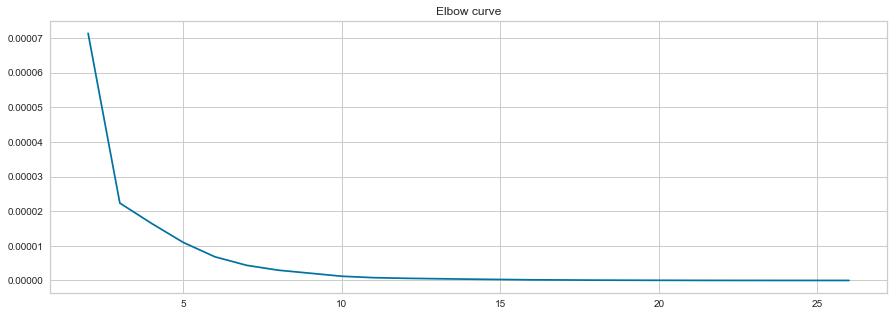

In [58]:
X = data
distorsions = []
for k in range(2, len(data)):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, len(data)), distorsions)
plt.grid(True)
plt.title('Elbow curve')

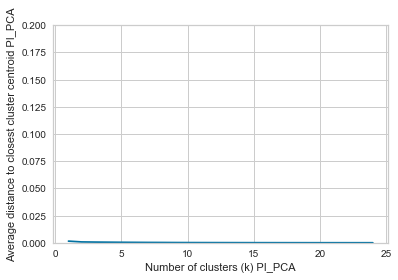

C:\Users\Javier\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Javier\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Javier\Anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


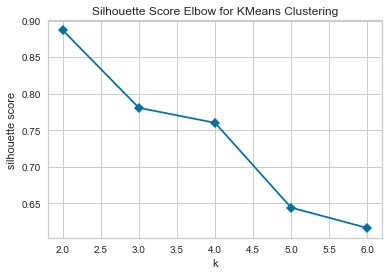

In [59]:
#Escoger k
distance_to_closter_cluster_centre = []
for k in range(2,(len(data)-1)):
    k_means = KMeans(n_clusters=k)  
    k_means.fit(X)
    distance = np.min(k_means.transform(X),axis=1)
    average_distance = np.mean(distance)
    distance_to_closter_cluster_centre.append(average_distance)

clusters = np.arange(len(distance_to_closter_cluster_centre))+1
plt.plot(clusters, distance_to_closter_cluster_centre)
plt.xlabel('Number of clusters (k) PI_PCA')
plt.ylabel('Average distance to closest cluster centroid PI_PCA')
plt.ylim(0,0.2)
plt.show()

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(k_means, k=(2,7), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof()

In [60]:
# aplicar K-means de sklearn
n_samples = 1500
random_state = 170

# Incorrect number of clusters
kmeans1 = KMeans(n_clusters=3, random_state=random_state)
kmeans1.fit(X)
y_pred = kmeans1.fit_predict(X) 
  
print('\nCluster centres PI:')
print(kmeans1.cluster_centers_)


Cluster centres PI:
[[-2.96535198e-05  1.86422127e-02]
 [ 1.62163099e-03  3.58053973e-02]
 [-1.65128451e-03  3.62265483e-02]]


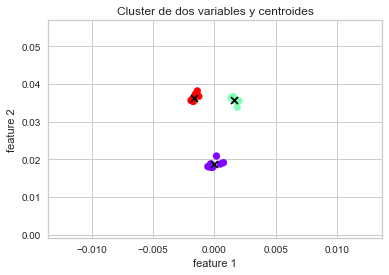

In [61]:
#grafica de las columnas 1 y 2 
labels1 = kmeans1.labels_

plt.scatter(X[:,0],X[:,1],c=labels1, cmap=plt.cm.rainbow)
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], c='Black', marker='x')
plt.title("Cluster de dos variables y centroides")
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show() 

In [62]:
def CH_index(X, labels, centroids):
    mean = np.mean(X,axis=0) 
    B = np.sum([ np.sum(labels==i)*(c - mean)**2 for i,c in enumerate(centroids)])
    W = np.sum([ (X-centroids[labels[i]])**2 for i, X in enumerate(X)])
    c = len(centroids)
    n = len(X)
    return ((n-c)*B )/1.0/((c-1)*W)

In [63]:
# Calculate silhouette_score
print('\n Silhouette_score PI_STD:')
print(silhouette_score(X, kmeans1.labels_))

CH_index_std=CH_index(X, kmeans1.labels_, kmeans1.cluster_centers_)
print('\n CH_index_std:',CH_index_std)


 Silhouette_score PI_STD:
0.780531692545074

 CH_index_std: 998.9133007318538


In [64]:
data=pd.DataFrame({'Returns': data[:, 0], 'Volatility': data[:, 1]})
data['ClusterkMeans'] = labels1
data

,Returns,Volatility,ClusterkMeans
0,0.001875,0.033800,1
1,-0.001379,0.038124,2
2,0.000496,0.018730,0
3,0.002014,0.035474,1
4,-0.001262,0.036683,2
5,0.000752,0.019090,0
6,0.001479,0.036297,1
7,-0.001796,0.035551,2
8,-0.000318,0.017862,0
9,0.001566,0.036536,1


In [65]:
sharpeclusters =[] 
Features = Features.tail(n)
for i in range(data['ClusterkMeans'].nunique()):
    
    l = data.loc[data['ClusterkMeans'] == i].index.values.astype(int).tolist()
    dfexp=Features.pct_change().iloc[: , l].sum(axis = 1, skipna = True)
    r = dfexp.mean()
    s = stdev(dfexp)
    
    sharpeclusters.append(r/s)
sharpeclusters = np.asanyarray(sharpeclusters)

In [66]:
selection = sharpeclusters.argmax()


In [67]:
sharpeclusters

array([-0.00435092,  0.04666274, -0.04692949])

In [68]:
cond = data['ClusterkMeans'] == selection

data['selection'] = np.where(cond, 1, 0)


In [69]:
data

,Returns,Volatility,ClusterkMeans,selection
0,0.001875,0.033800,1,1
1,-0.001379,0.038124,2,0
2,0.000496,0.018730,0,0
3,0.002014,0.035474,1,1
4,-0.001262,0.036683,2,0
5,0.000752,0.019090,0,0
6,0.001479,0.036297,1,1
7,-0.001796,0.035551,2,0
8,-0.000318,0.017862,0,0
9,0.001566,0.036536,1,1


In [70]:
sharpeclusters


array([-0.00435092,  0.04666274, -0.04692949])